In [60]:
import matplotlib
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

#Read in the csv. Throw out bad lines-- there are just a few of the 9000-- and suppress warnings.
filepath = "./emerald_equity_hpd_violations.csv"
df = pd.read_csv(filepath, error_bad_lines=False, warn_bad_lines=False)
#Wrap text, because I want to see those commplaints in their entirety
pd.set_option('display.max_colwidth', -1)

filepath2 = "./emerald_equity_dob_complaints.csv"
df_dob = pd.read_csv(filepath2)
'''CREATE TABLE emerald_equity_dob_complaints AS
SELECT complaintcategory, status, complaintnumber, inspectiondate, housenumber, housestreet
FROM dob_complaints
JOIN emerald_equity_bin_bbl
ON dob_complaints.bin = emerald_equity_bin_bbl.bin;'''

#This is for all of East Harlem
df_dob_harlem = pd.read_csv('east_harlem_dob_complaints.csv', low_memory=False)

df_recent = pd.read_csv("./emerald_equity_dob_complaints1.csv")
'''CREATE TABLE recent_emerald_equity_dob_complaints AS select complaintcategory, status, complaintnumber, inspectiondate, housenumber, housestreet
FROM dob_complaints
JOIN emerald_equity_bin_bbl
ON dob_complaints.bin = emerald_equity_bin_bbl.bin
WHERE dobrundate > '2017-01-01';'''

df_historical = pd.read_csv("./emerald_equity_dob_complaints_historical.csv")
'''CREATE TABLE recent_emerald_equity_dob_complaints AS select complaintcategory, status, complaintnumber, inspectiondate, housenumber, housestreet
FROM dob_complaints
JOIN emerald_equity_bin_bbl
ON dob_complaints.bin = emerald_equity_bin_bbl.bin
WHERE dobrundate > '2015-08-30' AND dobrundate < '2017-01-01';'''

df_hpdnonrecent = pd.read_csv("./hpd_violations_descr.csv")

df_hpdrecent = pd.read_csv("./recent_hpd_violations.csv")



harlem_hpd_df = pd.read_csv("./hpd_harlem.csv")
ee_hpd_df = pd.read_csv("./hpd_emerald_equity.csv")

hpd_class = pd.read_csv("./class_hpd_emerald_equity.csv")

harlem_lit_df = pd.read_csv("./EH_lit_over_time.csv")
ee_lit_df = pd.read_csv("./lit_over_time.csv")

In [173]:
hpd_class = hpd_class[hpd_class['class'] != 'I']
hpd_class = pd.get_dummies(hpd_class, columns=['class'])

In [174]:
hpd_class['A'] = hpd_class['class_A']
hpd_class['B'] = hpd_class['class_B']
hpd_class['C'] = hpd_class['class_C']
hpd_class['date'] = hpd_class['inspectiondate']
hpd_class.drop(['class_A', 'class_B', 'class_C', 'inspectiondate'],axis=1)
hpd_class['date']=pd.to_datetime(hpd_class['date'], infer_datetime_format=True, errors='ignore')

In [175]:
hpd_class = hpd_class[hpd_class['date']>'2014-01-01']
hpd_class = hpd_class.set_index('date')

In [176]:
hpd_class = hpd_class.groupby('date').sum()

In [178]:
hpd_class.resample('SM').sum().to_csv("hpd_violations_date_class_resample.csv")


In [179]:
#These are the things I want to pay attention to
df_hpdnonrecent['Mold'] = df_hpdnonrecent['novdescription'].str.contains('MOLD').astype(int)
df_hpdnonrecent['Gas'] = df_hpdnonrecent['novdescription'].str.contains('GAS').astype(int)
df_hpdnonrecent['Heat'] = df_hpdnonrecent['novdescription'].str.contains('HEAT').astype(int)
df_hpdnonrecent['Pests'] = df_hpdnonrecent['novdescription'].str.contains('PEST|RODENT|ROACH|MICE|BEDBUGS|RAT').astype(int)
df_hpdnonrecent['Scalding_Water'] = df_hpdnonrecent['novdescription'].str.contains('SCALDING').astype(int)
df_hpdnonrecent['Lead'] = df_hpdnonrecent['novdescription'].str.contains('LEAD').astype(int)
df_hpdnonrecent['Bedbugs'] = df_hpdnonrecent['novdescription'].str.contains('BEDBUGS').astype(int)
#set index as bbl
df_hpdnonrecent.set_index('bbl', inplace=True)

KeyError: 'bbl'

In [181]:
df= df_hpdnonrecent[df_hpdnonrecent['inspectiondate']>'2014-01-01']
df['inspectiondate'] = pd.to_datetime(df['inspectiondate'], infer_datetime_format=True, errors='ignore')
df = df.groupby('inspectiondate').sum()
df.resample('M').sum().to_csv('hpd_categorical.csv')
df.resample('M').sum()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Mold,Gas,Heat,Pests,Scalding_Water,Lead,Bedbugs
inspectiondate,,,,,,,
2014-01-31,3,1,10,20,1,7,1
2014-02-28,6,1,3,4,12,3,0
2014-03-31,1,2,14,10,3,4,1
2014-04-30,3,1,2,21,0,16,0
2014-05-31,4,0,0,6,0,5,0
2014-06-30,1,1,0,23,0,13,2
2014-07-31,4,1,0,14,0,1,0
2014-08-31,1,1,0,6,0,1,1
2014-09-30,2,3,1,6,0,0,0


In [45]:
#Just pay attention to the first instance of a complaint
df_dob_ee = df_dob
df_dob_ee.drop_duplicates(subset=['complaintnumber'], keep='first',inplace=True)
df_dob_ee['inspectiondate']= pd.to_datetime(df_dob_ee['inspectiondate'], infer_datetime_format=True, errors='ignore')
df_dob_ee = df_dob_ee.groupby('inspectiondate')['complaintcategory'].value_counts().unstack().fillna(0)

In [46]:
df_dob_harlem['inspectiondate'] = pd.to_datetime(df_dob_harlem['inspectiondate'], infer_datetime_format=True, errors='coerce')

In [47]:
#Just pay attention to the first instance of a complaint
df_dob_harlem.drop_duplicates(subset=['complaintnumber'], keep='first',inplace=True)
df_dob_harlem = df_dob_harlem.set_index(pd.DatetimeIndex(df_dob_harlem['inspectiondate']))
df_dob_harlem = df_dob_harlem.groupby('inspectiondate')['complaintcategory'].value_counts().unstack().fillna(0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'inspectiondate' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


In [48]:
#Sum all of the columns: for this part, we do not care about types of DOB complaints.
df_dob_harlem['summed'] = df_dob_harlem.sum(axis=1)

#sum up the columns for the other DF
df_dob_ee['summed'] = df_dob_ee.sum(axis=1)

In [49]:
#get the per-building number
df_dob_ee['Emerald_Equity']=df_dob_ee['summed']/1449*1000
df_dob_harlem['East_Harlem']=df_dob_harlem['summed']/51170*1000
df_dob_harlem['summed_harlem'] = df_dob_harlem['summed']

In [50]:
df_dob_harlem.reset_index().set_index('inspectiondate', inplace=True)
df_dob_ee.reset_index().set_index('inspectiondate', inplace=True)

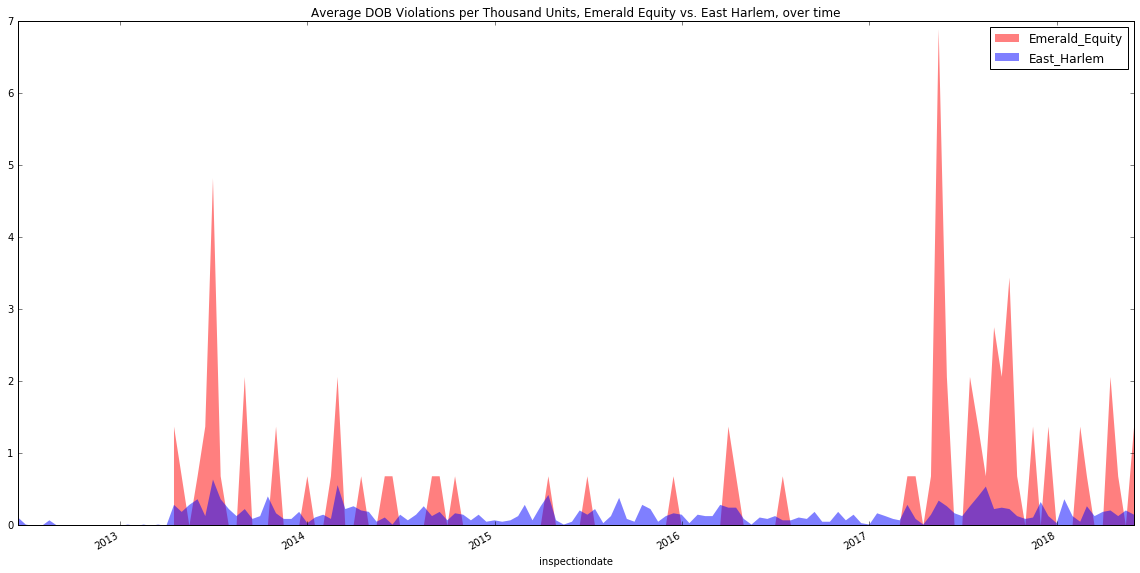

In [51]:
#This does not include duplicate complaint numbers:
#so for 1 complaint number with rows ACTIVE, ACTIVE, ACTIVE, CLOSED it will only count as 1.
#1 month average

ax = df_dob_ee.resample('SM').sum().plot(kind='area', y='Emerald_Equity', figsize = (20, 10), legend=True, linewidth=0, color='red', alpha=.5)
df_dob_harlem.resample('SM').sum().plot(kind='area', y='East_Harlem', figsize = (20, 10), legend=True, linewidth=0, color='blue', alpha=.5, ax=ax)
plt.title("Average DOB Violations per Thousand Units, Emerald Equity vs. East Harlem, over time")

dob_combined = df_dob_ee[['summed']].join(df_dob_harlem[['summed_harlem']], how='outer')
dob_combined.resample('M').sum().to_csv('combined_dob.csv')

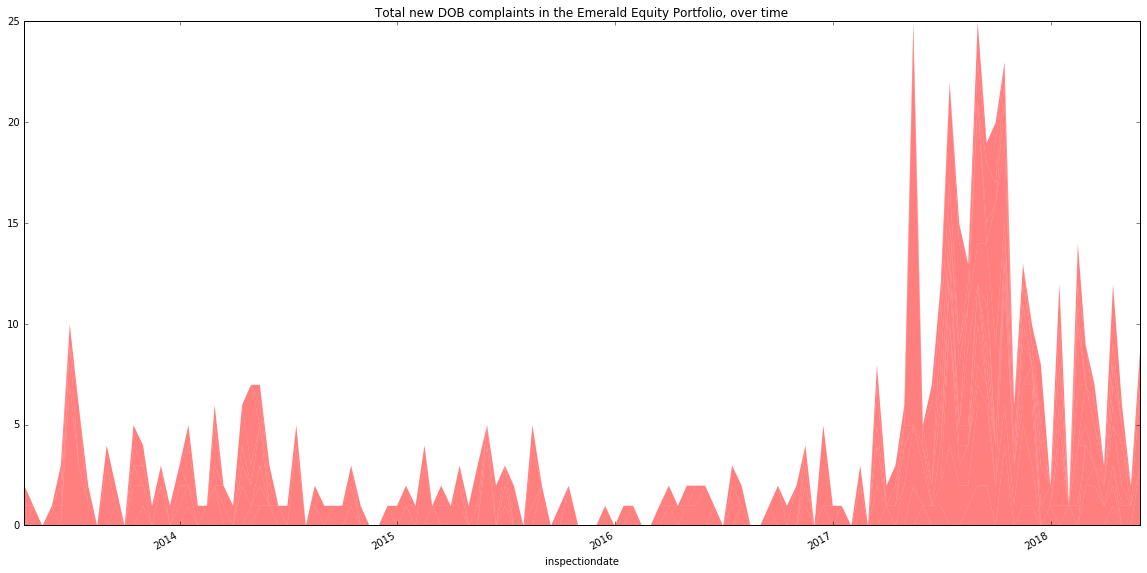

In [52]:
#This counts all violations, regardless of number of times inspected/reupped/closed.
df_dob = pd.read_csv(filepath2)
df_dob['inspectiondate']= pd.to_datetime(df_dob['inspectiondate'], infer_datetime_format=True, errors='ignore')
df_dob_zoom = df_dob
df_dob = df_dob.groupby('inspectiondate')['complaintcategory'].value_counts().unstack().fillna(0)
df_dob.resample('SM').sum().plot(kind='area', stacked=True, figsize = (20, 10), legend=False, linewidth=0, color='red', alpha=.5)
plt.title("Total new DOB complaints in the Emerald Equity Portfolio, over time")


In [53]:
purchase=datetime.date(2016,12,27)

df_dob_zoom = df_dob_zoom[df_dob_zoom['inspectiondate']>purchase]
df_dob_zoom = df_dob_zoom.groupby('inspectiondate')['complaintcategory'].value_counts().unstack().fillna(0)

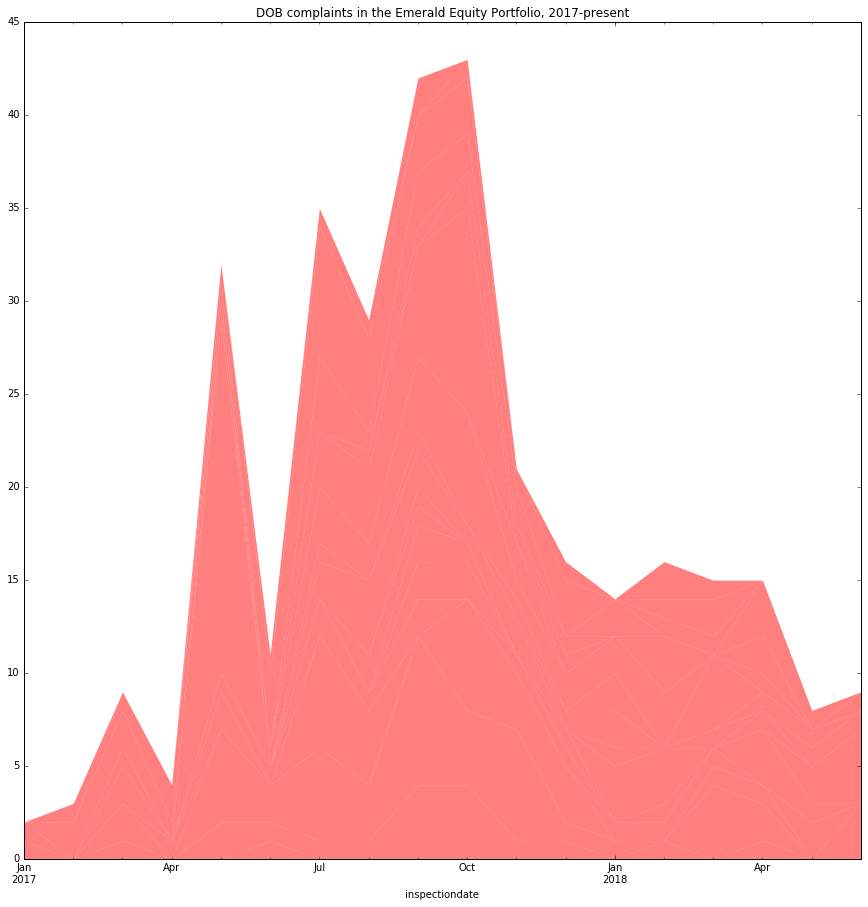

In [54]:
#This also counts repeated complaint numbers.

df_dob_zoom.resample('M').sum().plot(kind='area', stacked=True, figsize = (15, 15), legend=False, linewidth=0, color='red', alpha=.5)
plt.title("DOB complaints in the Emerald Equity Portfolio, 2017-present")
plt.savefig("DOB_overtime_zoom.png")

In [55]:
# Change the date to datetime, and set it as the index
ee_hpd_df['receiveddate']= pd.to_datetime(ee_hpd_df['receiveddate'], infer_datetime_format=True, errors='ignore')
ee_hpd_df.set_index('receiveddate', inplace=True)

In [56]:
# Change the date to datetime, and set it as the index
harlem_hpd_df['receiveddate']= pd.to_datetime(harlem_hpd_df['receiveddate'], infer_datetime_format=True, errors='raise')
harlem_hpd_df.set_index('receiveddate', inplace=True)

#normalize both by total number of buildings in the subset. These are numbers from Pluto_17v1
'''SQL:
select sum(unitsres) from pluto_17v1 WHERE zipcode = '10029' OR zipcode = '10035';
  sum  
-------
 51170
(1 row)
'''

'''select sum(unitsres) from pluto_17v1 JOIN emerald_equity_bin_bbl ON emerald_equity_bin_bbl.bbl = pluto_17v1.bbl;
 sum  
------
 1449
(1 row)
'''


ee_hpd_df['Emerald_Equity_Count'] = ee_hpd_df['count']
harlem_hpd_df['East_Harlem_Count'] = harlem_hpd_df['count']

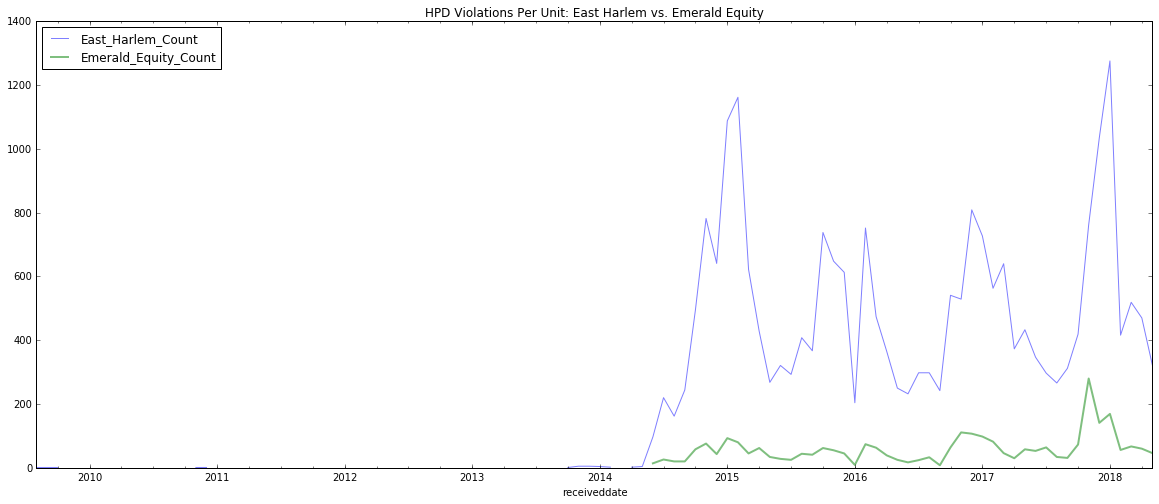

In [57]:
#Drop the original count columns, this looks better for the key
ee_hpd_df.drop('count',axis=1,inplace=True)
harlem_hpd_df.drop('count',axis=1,inplace=True)

#Plot the things
ax = harlem_hpd_df.resample('M').sum().plot(kind='line', alpha=.5, color='blue')
ee_hpd_df.resample('M').sum().plot(kind='line', alpha=.5, color='green', figsize =(20,8),linewidth=2, ax=ax)

#Set the title
plt.title("HPD Violations Per Unit: East Harlem vs. Emerald Equity")

In [58]:
comb_hpd_df = harlem_hpd_df.join(ee_hpd_df, how='outer')

In [59]:
comb_hpd_df = comb_hpd_df.reset_index()

In [62]:
comb_hpd_df = comb_hpd_df[comb_hpd_df['receiveddate']>'2014-01-01']

In [64]:
comb_hpd_df = comb_hpd_df.set_index('receiveddate')

In [70]:
comb_hpd_df.resample('SM').sum().to_csv("hpd_harlem_ee.csv")

In [69]:
comb_hpd_df

,East_Harlem_Count,Emerald_Equity_Count
receiveddate,,
2014-01-06,1.0,NaN
2014-01-21,1.0,NaN
2014-01-22,1.0,NaN
2014-01-23,1.0,NaN
2014-02-11,1.0,NaN
2014-02-12,1.0,NaN
2014-04-15,1.0,NaN
2014-04-21,1.0,NaN
2014-05-05,1.0,NaN


In [61]:
harlem_lit_df['caseopendate'] = pd.to_datetime(harlem_lit_df['caseopendate'],infer_datetime_format=True)
ee_lit_df['caseopendate'] = pd.to_datetime(ee_lit_df['caseopendate'],infer_datetime_format=True)

In [62]:
harlem_lit_df = harlem_lit_df.set_index('caseopendate')
ee_lit_df = ee_lit_df.set_index('caseopendate')

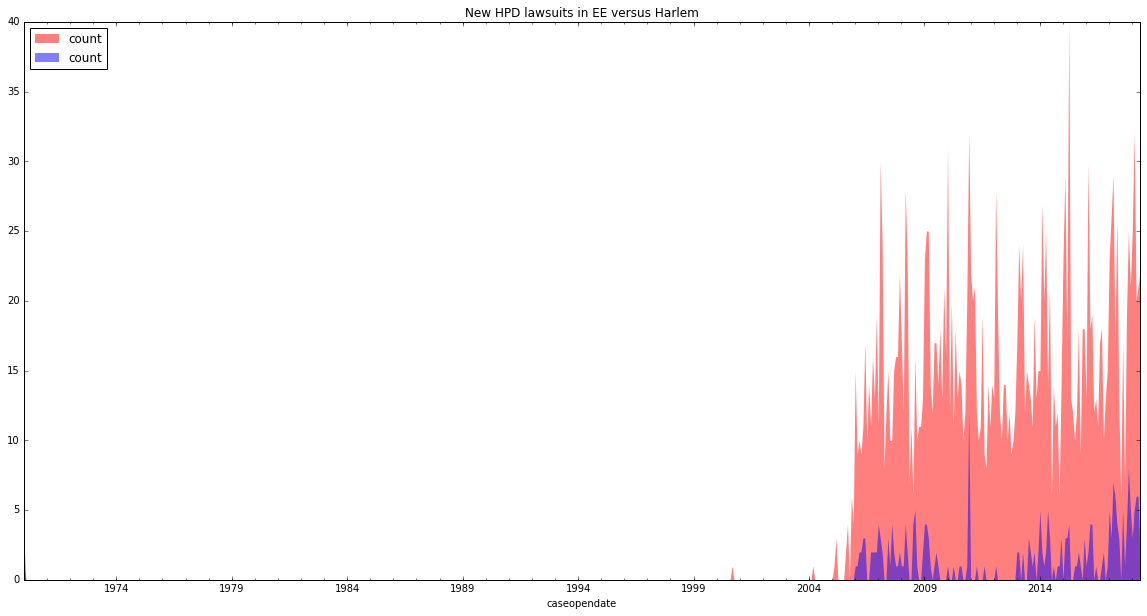

In [63]:
ax = harlem_lit_df.resample('M').sum().plot(kind='area', y='count', figsize = (20, 10), legend=True, linewidth=0, color='red', alpha=.5)
ee_lit_df.resample('M').sum().plot(kind='area', y='count', figsize = (20, 10), legend=True, linewidth=0, color='blue', alpha=.5, ax=ax)
plt.title("New HPD lawsuits in EE versus Harlem")

In [64]:
harlem_lit_df.to_csv('../data/harlem_lit_df.csv')
ee_lit_df.to_csv('../data/ee_lit_df.csv')

In [65]:
harlem_lit_df = harlem_lit_df.join(ee_lit_df,rsuffix='_ee').reset_index().fillna(value=0)

In [66]:
harlem_lit_df['count'] = harlem_lit_df['count'].astype(float)
harlem_lit_df = harlem_lit_df.set_index('caseopendate').resample('SM').sum()

In [68]:
harlem_lit_df['2014-01-01':].to_csv('../data/harlem_ee_lit.csv')